In [2]:
import pandas as pd
import numpy as np
import requests
import requests_cache
import time
import lxml.html as lx
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [4]:
so = pd.read_csv('so_2018.csv')
so

,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,...,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents
0,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,...,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes
1,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,...,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes
2,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,...,Less than 30 minutes,3 - 4 times per week,NaN,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No
4,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,...,1 - 2 hours,Never,NaN,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes
5,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,...,30 - 59 minutes,1 - 2 times per week,NaN,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No
6,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,...,Less than 30 minutes,1 - 2 times per week,NaN,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No
7,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,0-2 years,3-5 years,...,1 - 2 hours,Daily or almost every day,NaN,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No
8,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,...,Less than 30 minutes,1 - 2 times per week,Standing desk;Fatigue-relieving floor mat,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes
9,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,

In [11]:
so = so.drop(['DevType', 'OpenSource'], axis = 1)

Text(0.5, 0, 'Count')

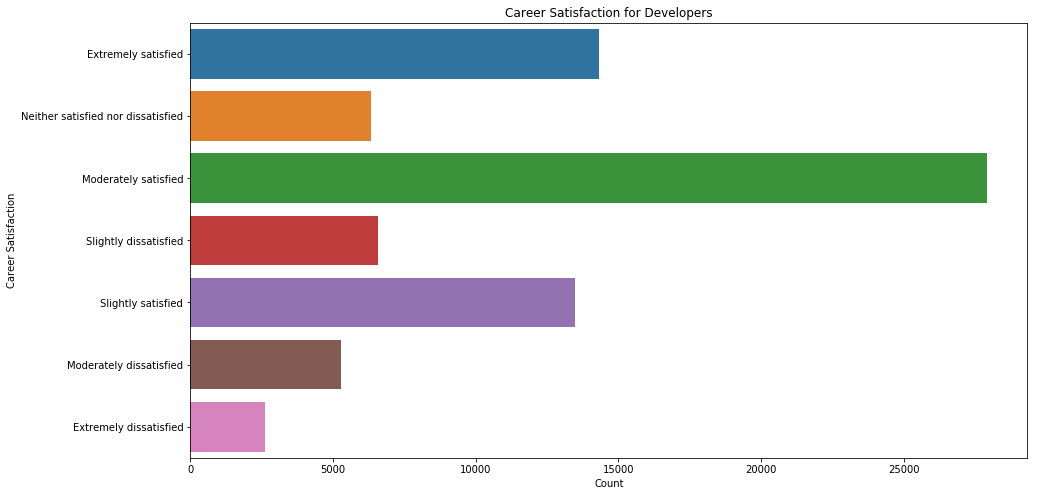

In [61]:
plt.figure(figsize = (15,8))
ax = sns.countplot(y = 'CareerSatisfaction', data = so)
ax.set_title("Career Satisfaction for Developers")
ax.set_ylabel("Career Satisfaction")
ax.set_xlabel("Count")

Text(0.5, 0, 'Count')

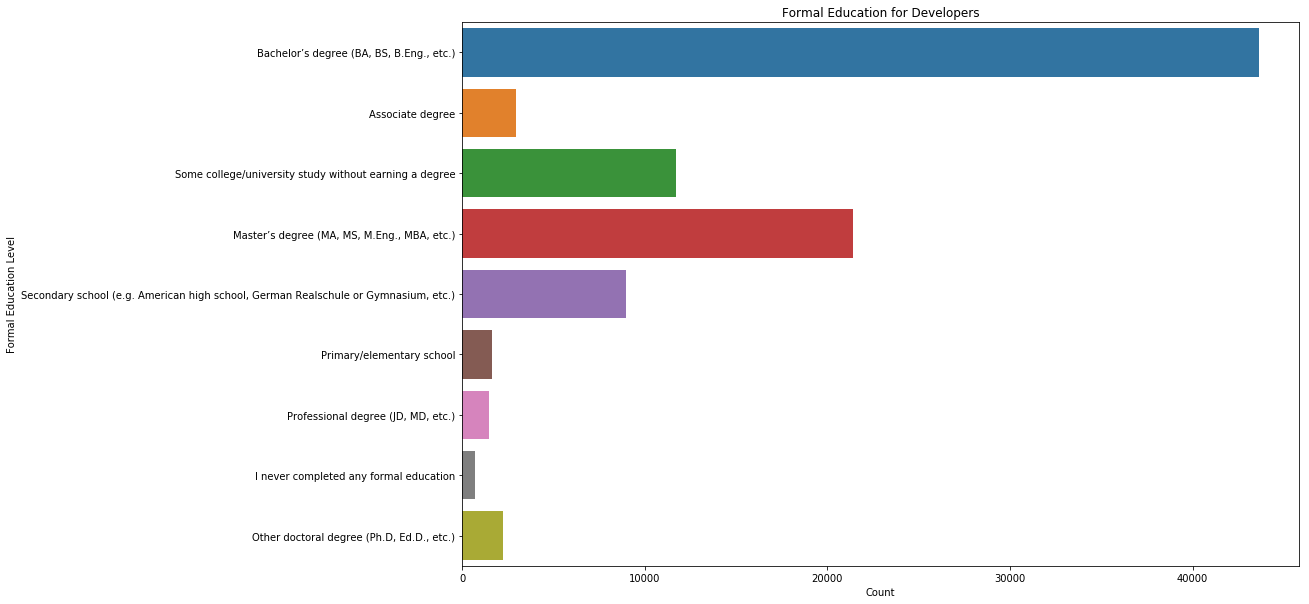

In [58]:
plt.figure(figsize = (15,10))
ax = sns.countplot(y = 'FormalEducation', data = so)
ax.set_title("Formal Education for Developers")
ax.set_ylabel("Formal Education Level")
ax.set_xlabel("Count")

Text(0.5, 0, 'Count')

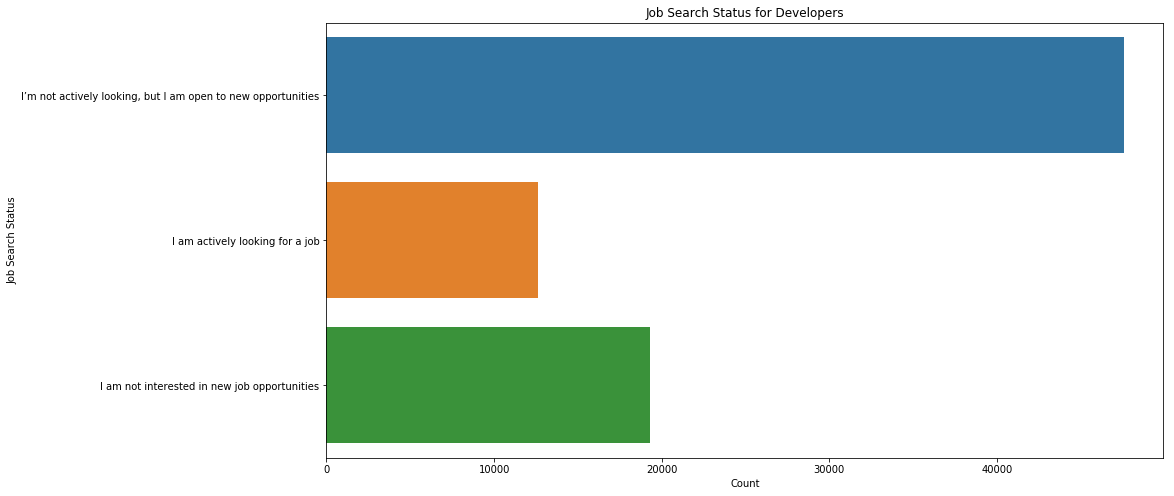

In [53]:
plt.figure(figsize = (15,8))
ax = sns.countplot(y = 'JobSearchStatus', data = so)
ax.set_title("Job Search Status for Developers")
ax.set_ylabel('Job Search Status')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

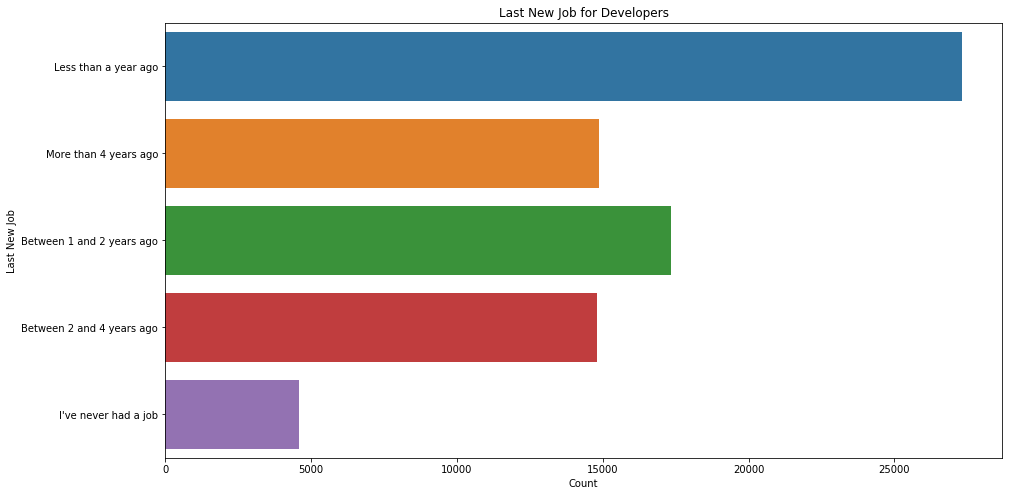

In [55]:
plt.figure(figsize = (15,8))
ax = sns.countplot(y = 'LastNewJob', data = so)
ax.set_title("Last New Job for Developers")
ax.set_ylabel("Last New Job")
ax.set_xlabel("Count")